In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})

# for the TESS Science Online 48hr sprint, we'll be using Cyberpunk for the graphics!
# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

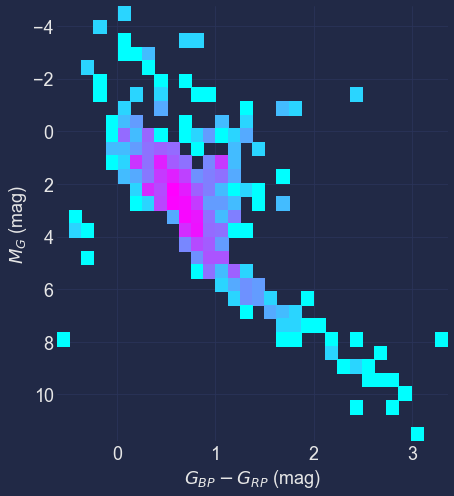

In [3]:
# EHow = pd.read_csv('EHow.csv')
EHow = pd.read_csv('Erin_and_Known_EBs.csv')
Eok = ((EHow['parallax'] > 0) & 
       np.isfinite(EHow['bp_rp']) & 
       np.isfinite(EHow['phot_g_mean_mag']))

plt.figure(figsize=(7,8))
plt.hist2d(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=2**5)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)

Text(1.5, -3, 'FYI: NONSENSE!')

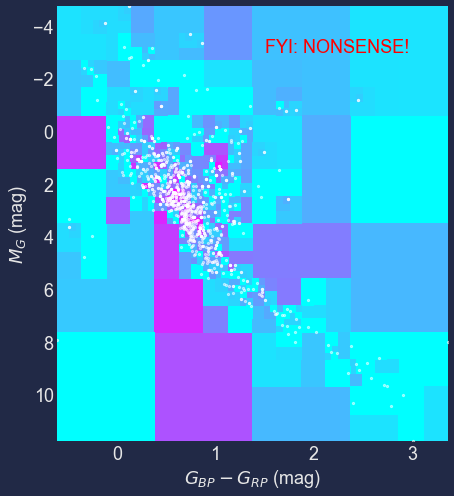

In [4]:
plt.figure(figsize=(7,8))

for k in range(7):
    plt.hist2d(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=2**(k))

plt.scatter(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5, c='w', s=5, alpha=0.5)

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.text(1.5,-3, 'FYI: NONSENSE!', c='r')

# DIY QT
let's build a simple QuadTree example, with 3 goals:

1. establish a tree and measure density of sources
2. using the SAME tree, measure density of new sources
3. compare relative densities for our EB Score project!

- Start by brute-force using `np.histogram2d` to get the deepest level of the tree, 
- 

In [5]:
rng=[]
len(rng)

0

In [54]:
def QThist(x,y, N=5, thresh=4, rng=[], density=False):
    
    # start w/ 2x2 array of False leafs
    Mnext = np.empty((2**1,2**1),dtype='Bool')*False
    
    # the 5 quantities to save in our Tree
    num = np.array([])
    xmin = np.array([])
    xmax = np.array([])
    ymin = np.array([])
    ymax = np.array([])
    
    # Step thru each level of the Tree
    for k in range(1, N+1):
        if len(rng) == 0:
            dx = (np.nanmax(x) - np.nanmin(x)) / (2**k)
            dy = (np.nanmax(y) - np.nanmin(y)) / (2**k)
            rng = [[np.nanmin(x)-dx/4, np.nanmax(x)+dx/4], 
                   [np.nanmin(y)-dy/4, np.nanmax(y)+dy/4]]

        # lazily compute histogram of data at this level
        H1, xedges1, yedges1 = np.histogram2d(x, y, range=rng, bins=2**k,)

        # any leafs at this level to pick, but NOT previously picked?
        if k<N:
            M1 = (H1 <= thresh)
        if k==N:
            # unless we on the last level, then pick the rest of the leafs
            M1 = ~Mnext

        Mprep = np.empty((2**(k+1),2**(k+1)),dtype='Bool')*False
        
        # if all the leafs are already picked, then stop checking
        if np.sum(M1) != np.size(M1):

            # check leafs at this level
            for i in range(M1.shape[0]):
                for j in range(M1.shape[1]):
                    # up-scale the leaf-picking True/False to next level
                    if k<N:
                        Mprep[(i*2):((i+1)*2),(j*2):((j+1)*2)] = M1[i,j] | Mnext[i,j]

                    # if newly ready to pick, save 5 values
                    if M1[i,j] & ~Mnext[i,j]:
                        num = np.append(num, H1[i,j])
                        xmin = np.append(xmin, xedges1[i])
                        xmax = np.append(xmax, xedges1[i+1])
                        ymin = np.append(ymin, yedges1[j])
                        ymax = np.append(ymax, yedges1[j+1])

        Mnext = Mprep

    if density:
#   following example from np.histogram:
#   result is the value of the probability *density* function at the bin, 
#   normalized such that the *integral* over the range is 1
        num = num / ((ymax - ymin) * (xmax - xmin)) / num.sum()
        
    return num, xmin, xmax, ymin, ymax

In [7]:
def QTcount(x,y,xmin, xmax, ymin, ymax):
    '''
    given rectangular output ranges for cells/leafs from QThist
    count the occurence rate of NEW data in these cells
    '''
    
    num = np.zeros_like(xmin)
    for k in range(len(xmin)):
        num[k] = np.sum((x >= xmin[k]) & (x < xmax[k]) & 
                        (y >= ymin[k]) & (y < ymax[k]))
        
    return num

# breakdown
show a QuadTree totally step by step

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys
/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


Text(0.5, 1.0, 'Depth=1/4')

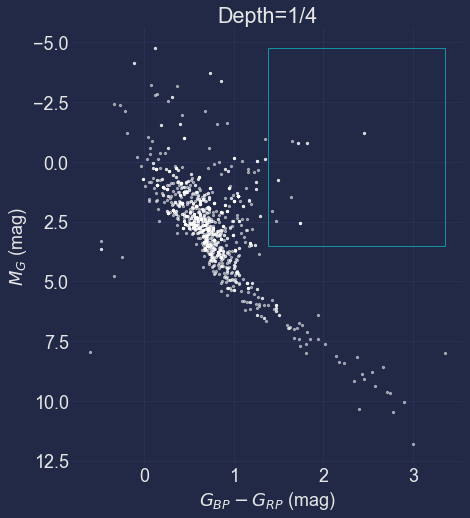

In [50]:
x = EHow['bp_rp'][Eok]
y = EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5

N=4
thresh=15
# start w/ 2x2 array of False leafs
Mnext = np.empty((2**1,2**1),dtype='Bool')*False

# the 5 quantities to save in our Tree
num = np.array([])
xmin = np.array([])
xmax = np.array([])
ymin = np.array([])
ymax = np.array([])

k=1
# lazily compute histogram of data at this level
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=2**k)

# any leafs at this level to pick, but NOT previously picked?
if k<N:
    M1 = (H1 <= thresh)
if k==N:
    # unless we on the last level, then pick the rest of the leafs
    M1 = ~Mnext

Mprep = np.empty((2**(k+1),2**(k+1)),dtype='Bool')*False

# check leafs at this level
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        # up-scale the leaf-picking True/False to next level
        if k<N:
            Mprep[(i*2):((i+1)*2),(j*2):((j+1)*2)] = M1[i,j] | Mnext[i,j]

        # if newly ready to pick, save 5 values
        if M1[i,j] & ~Mnext[i,j]:
            num = np.append(num, H1[i,j])
            xmin = np.append(xmin, xedges1[i])
            xmax = np.append(xmax, xedges1[i+1])
            ymin = np.append(ymin, yedges1[j])
            ymax = np.append(ymax, yedges1[j+1])

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
plt.scatter(x,y, c='w', s=5, alpha=0.5)
for l in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[l], ymin[l]), xmax[l]-xmin[l], ymax[l]-ymin[l], 
                               fc ='none', ec='C0', lw=1, alpha=0.5))

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('Depth='+str(k)+'/'+str(N))

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


Text(0.5, 1.0, 'Depth=2/4')

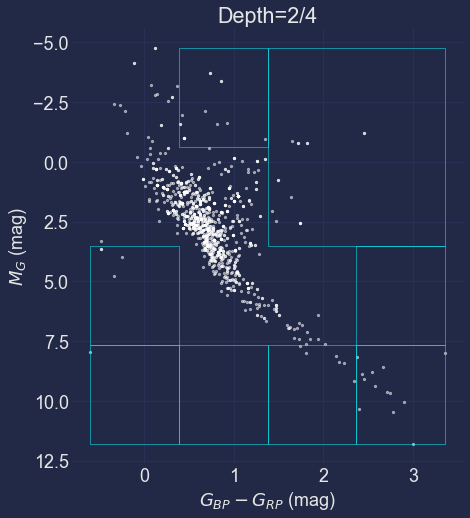

In [51]:
Mnext = Mprep
k=2
# lazily compute histogram of data at this level
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=2**k)

# any leafs at this level to pick, but NOT previously picked?
if k<N:
    M1 = (H1 <= thresh)
if k==N:
    # unless we on the last level, then pick the rest of the leafs
    M1 = ~Mnext

Mprep = np.empty((2**(k+1),2**(k+1)),dtype='Bool')*False

# check leafs at this level
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        # up-scale the leaf-picking True/False to next level
        if k<N:
            Mprep[(i*2):((i+1)*2),(j*2):((j+1)*2)] = M1[i,j] | Mnext[i,j]

        # if newly ready to pick, save 5 values
        if M1[i,j] & ~Mnext[i,j]:
            num = np.append(num, H1[i,j])
            xmin = np.append(xmin, xedges1[i])
            xmax = np.append(xmax, xedges1[i+1])
            ymin = np.append(ymin, yedges1[j])
            ymax = np.append(ymax, yedges1[j+1])

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
plt.scatter(x,y, c='w', s=5, alpha=0.5)
for l in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[l], ymin[l]), xmax[l]-xmin[l], ymax[l]-ymin[l], 
                               fc ='none', ec='C0', lw=1, alpha=0.5))

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('Depth='+str(k)+'/'+str(N))

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


Text(0.5, 1.0, 'Depth=3/4')

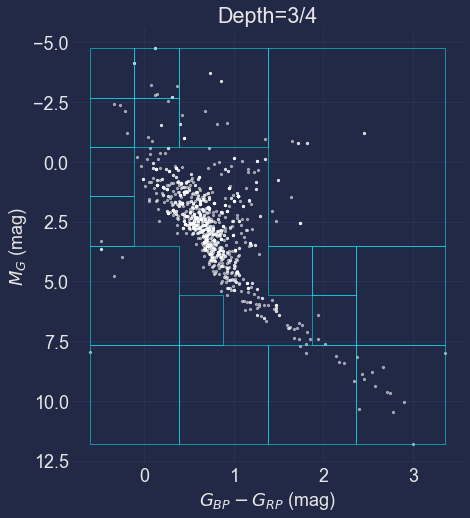

In [52]:
Mnext = Mprep
k=3
# lazily compute histogram of data at this level
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=2**k)

# any leafs at this level to pick, but NOT previously picked?
if k<N:
    M1 = (H1 <= thresh)
if k==N:
    # unless we on the last level, then pick the rest of the leafs
    M1 = ~Mnext

Mprep = np.empty((2**(k+1),2**(k+1)),dtype='Bool')*False

# check leafs at this level
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        # up-scale the leaf-picking True/False to next level
        if k<N:
            Mprep[(i*2):((i+1)*2),(j*2):((j+1)*2)] = M1[i,j] | Mnext[i,j]

        # if newly ready to pick, save 5 values
        if M1[i,j] & ~Mnext[i,j]:
            num = np.append(num, H1[i,j])
            xmin = np.append(xmin, xedges1[i])
            xmax = np.append(xmax, xedges1[i+1])
            ymin = np.append(ymin, yedges1[j])
            ymax = np.append(ymax, yedges1[j+1])

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
plt.scatter(x,y, c='w', s=5, alpha=0.5)
for l in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[l], ymin[l]), xmax[l]-xmin[l], ymax[l]-ymin[l], 
                               fc ='none', ec='C0', lw=1, alpha=0.5))

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('Depth='+str(k)+'/'+str(N))

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


Text(0.5, 1.0, 'Depth=4/4')

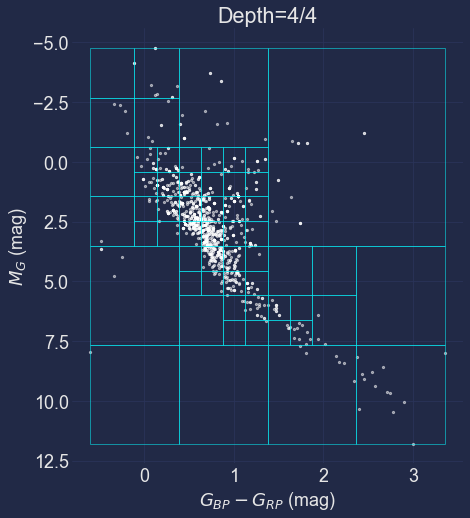

In [53]:
Mnext = Mprep
k=4
# lazily compute histogram of data at this level
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=2**k)

# any leafs at this level to pick, but NOT previously picked?
if k<N:
    M1 = (H1 <= thresh)
if k==N:
    # unless we on the last level, then pick the rest of the leafs
    M1 = ~Mnext

Mprep = np.empty((2**(k+1),2**(k+1)),dtype='Bool')*False

# check leafs at this level
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        # up-scale the leaf-picking True/False to next level
        if k<N:
            Mprep[(i*2):((i+1)*2),(j*2):((j+1)*2)] = M1[i,j] | Mnext[i,j]

        # if newly ready to pick, save 5 values
        if M1[i,j] & ~Mnext[i,j]:
            num = np.append(num, H1[i,j])
            xmin = np.append(xmin, xedges1[i])
            xmax = np.append(xmax, xedges1[i+1])
            ymin = np.append(ymin, yedges1[j])
            ymax = np.append(ymax, yedges1[j+1])

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
plt.scatter(x,y, c='w', s=5, alpha=0.5)
for l in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[l], ymin[l]), xmax[l]-xmin[l], ymax[l]-ymin[l], 
                               fc ='none', ec='C0', lw=1, alpha=0.5))

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.title('Depth='+str(k)+'/'+str(N))

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


Text(0, 0.5, '$M_G$ (mag)')

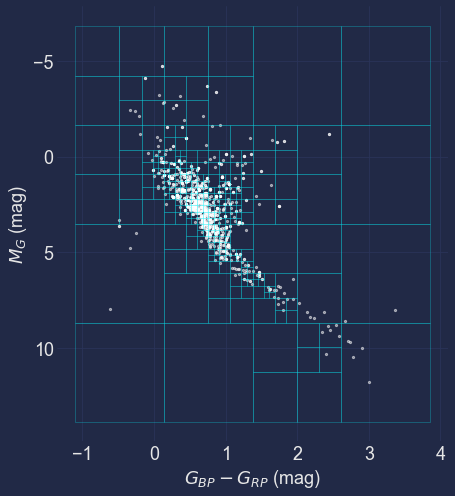

In [55]:
x = EHow['bp_rp'][Eok]
y = EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5

num, xmin, xmax, ymin, ymax = QThist(x,y, N=6, thresh=5)

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
plt.scatter(x,y, c='w', s=5, alpha=0.5)
for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc ='none', ec='C0', lw=0.5, alpha=0.5))

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')


In [13]:
# lets make sure, if we go and COUNT the stars themselves, we get the same number of counts again!
num2 = QTcount(x,y,xmin, xmax, ymin, ymax)

In [67]:
clr

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


Text(0, 0.5, '$M_G$ (mag)')

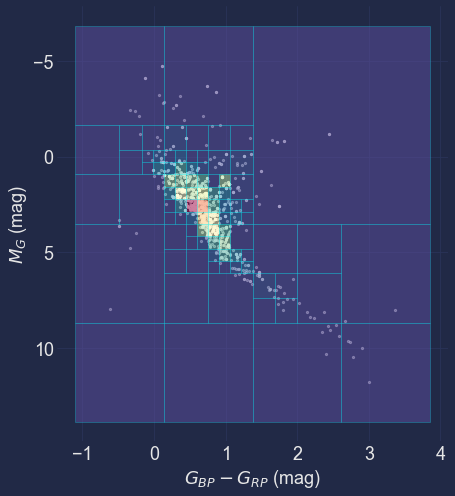

In [75]:
x = EHow['bp_rp'][Eok]
y = EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5

num, xmin, xmax, ymin, ymax = QThist(x,y, N=5, thresh=15, density=True)

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
plt.scatter(x,y, c='w', s=5, alpha=0.5)
CMAP = plt.cm.Spectral_r

# num = 10**num)
# scale SCORE to [0,1] for color codes
clr = (num - np.nanmin(num)) / (np.nanmax(num) - np.nanmin(num))

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc =CMAP(clr[k]), ec='C0', lw=0.5, alpha=0.5))

plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')



In [ ]:
np.histogram2d